# **Drift detection with an artificial time-series**

In [1]:
!pip install river

In [2]:
!pip install -U numpy

* Create an artificial time-series.
* This time-series is composed of two series that have different characteristics.

In [3]:
import numpy as np

np.random.seed(12345)
data_stream = np.concatenate(
    (np.random.randint(2, size=1000), np.random.randint(8, size=1000))
)

In [4]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


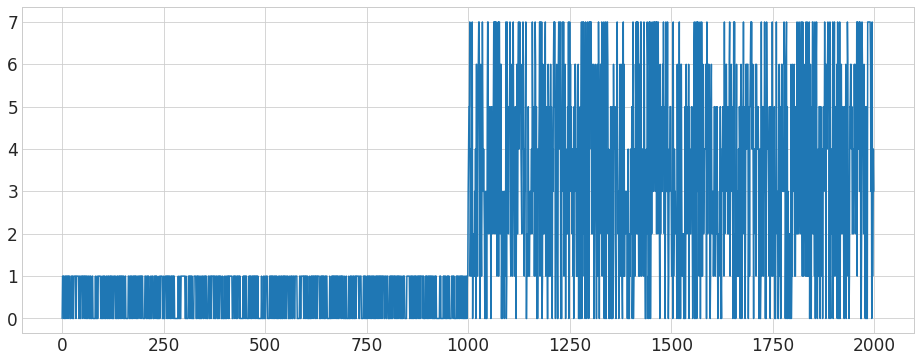

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(data_stream)

* Create a function for running the drift detector and feeding the
values into the drift detector.

In [6]:
def perform_test(drift_detector, data_stream):
    detected_indices = []
    for i, val in enumerate(data_stream):
        in_drift, in_warning = drift_detector.update(val)
        if in_drift:
            detected_indices.append(i)
    return detected_indices

* Try the Page-Hinkley and ADWIN drift detection method on this time-series.
* Create another method to plot the drift points overlaid over the time-series.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


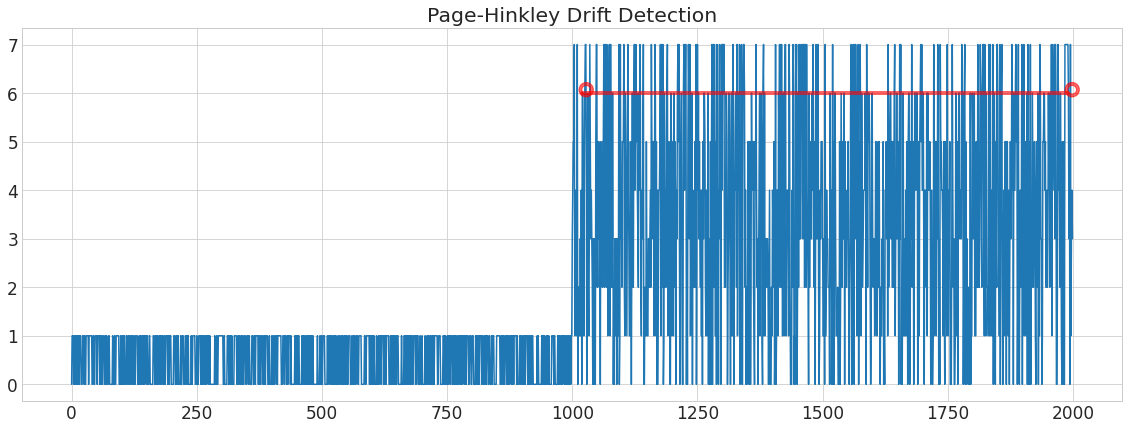

In [7]:
import matplotlib.pyplot as plt
from river.drift import ADWIN, PageHinkley

def show_drift(data_stream, indices):
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(data_stream)
    ax.plot(
        indices,
        data_stream[indices],
        "r",
        alpha=0.6,
        marker=r'$\circ$',
        markersize=22,
        linewidth=4
    )
    plt.tight_layout()


detected_indices = perform_test(PageHinkley(), data_stream)
show_drift(data_stream, detected_indices)
plt.title("Page-Hinkley Drift Detection");

* Plot for the ADWIN drift points.

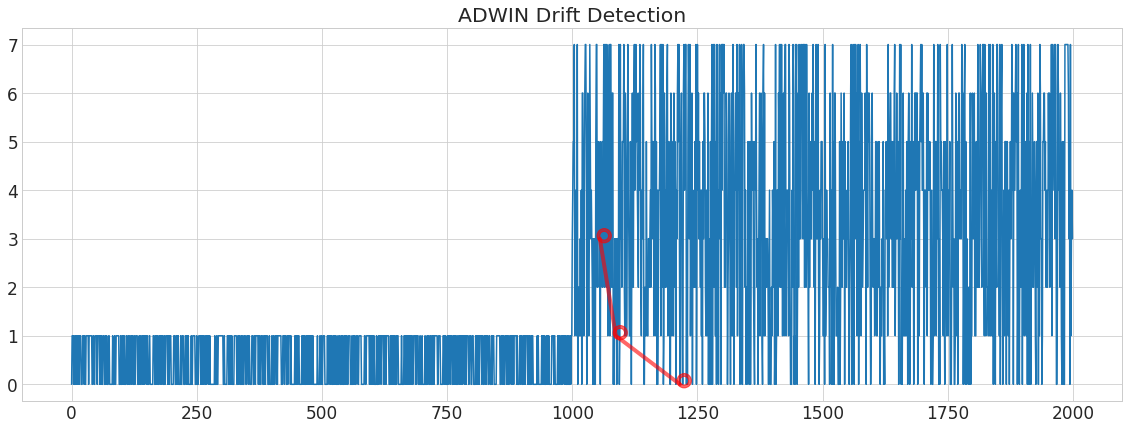

In [8]:
detected_indices = perform_test(ADWIN(), data_stream)
show_drift(data_stream, detected_indices)
plt.title("ADWIN Drift Detection");